## Подключение диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка библиотек

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Подготовка датасета

In [ ]:
!unzip -q "/content/drive/My Drive/Projects/Emotion classification/emotions.zip" -d '/content'

In [ ]:
!rm -rf '/content/Images/train/Disgust/' # Удаление папки Disgust с тренировочными файлами

In [ ]:
# Удаление файлов для выравнивания датасета в количестве 3120

dir = [x[0] for x in sorted(os.walk('/content/Images/train/'))]
fls = [x[2] for x in sorted(os.walk('/content/Images/train/'))]
for i in range(1, len(dir)):
    list_files = fls[i]
    del_files = list_files[3120:]
    for f in del_files:
        os.remove(dir[i]+'/'+f)


In [ ]:
# Проверка количества файлов в папках

dir = [x[0] for x in os.walk('/content/Images/train/')]
fls = [x[2] for x in os.walk('/content/Images/train/')]
for i in range(1, len(dir)):
    print(dir[i], ' - ', len(fls[i]), 'файлов')


/content/Images/train/Happy  -  3120 файлов
/content/Images/train/Fear  -  3120 файлов
/content/Images/train/Surprise  -  3120 файлов
/content/Images/train/Angry  -  3120 файлов
/content/Images/train/Sad  -  3120 файлов
/content/Images/train/Neutral  -  3120 файлов


In [ ]:
train_path = '/content/Images/train'
batch_size = 8
img_width  = 48 # Ширина изображения
img_height = 48 # Высота изображения

In [ ]:
# Генератор изображений

datagen = ImageDataGenerator(
    rescale=1. / 255, # Значения цвета меняем на дробные показания
    rotation_range=20, # Поворачиваем изображения при генерации выборки
    width_shift_range=0.2, # Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.2, # Двигаем изображения по высоте при генерации выборки
    zoom_range=0.2, # Зумируем изображения при генерации выборки
    horizontal_flip=True, # Отзеркаливание изображений
    fill_mode='nearest', # Заполнение пикселей вне границ ввода
    validation_split=0.2) # Указываем разделение изображений на обучающую и тестовую выборку

In [ ]:
# Обучающая выборка

train_generator = datagen.flow_from_directory(
    train_path, # Путь ко всей выборке выборке
    target_size=(img_width, img_height), # Размер изображений
    color_mode="grayscale",
    batch_size=batch_size, # Размер batch_size
    class_mode='categorical', # Категориальный тип выборки
    shuffle=True, # Перемешивание выборки
    subset='training') # Устанавливаем как набор для обучения

# Проверочная выборка

validation_generator = datagen.flow_from_directory(
    train_path, # Путь ко всей выборке выборке
    target_size=(img_width, img_height), # Размер изображений
    color_mode="grayscale",
    batch_size=batch_size, # Размер batch_size
    class_mode='categorical', # Категориальный тип выборки
    shuffle=True, # Перемешивание выборки
    subset='validation') # Устанавливаем как валидационный набор


Found 14976 images belonging to 6 classes.
Found 3744 images belonging to 6 classes.


## Модель

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 conv2d_37 (Conv2D)          (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                 

## Обучение модели

In [ ]:
learning_rate=1e-4

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // batch_size,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // batch_size,
                    epochs=50,
                    verbose=1,
                    initial_epoch=0)


Epoch 1/50
1872/1872 [==============================] - 53s 26ms/step - loss: 1.7893 - accuracy: 0.1754 - val_loss: 1.7712 - val_accuracy: 0.2179
Epoch 2/50
1872/1872 [==============================] - 37s 20ms/step - loss: 1.7608 - accuracy: 0.2242 - val_loss: 1.7374 - val_accuracy: 0.2431
Epoch 3/50
1872/1872 [==============================] - 37s 20ms/step - loss: 1.7062 - accuracy: 0.2591 - val_loss: 1.6781 - val_accuracy: 0.2658
Epoch 4/50
1872/1872 [==============================] - 37s 20ms/step - loss: 1.6188 - accuracy: 0.3071 - val_loss: 1.5994 - val_accuracy: 0.3344
Epoch 5/50
1872/1872 [==============================] - 37s 20ms/step - loss: 1.5653 - accuracy: 0.3387 - val_loss: 1.5336 - val_accuracy: 0.3699
Epoch 6/50
1872/1872 [==============================] - 37s 20ms/step - loss: 1.4892 - accuracy: 0.3847 - val_loss: 1.4593 - val_accuracy: 0.4279
Epoch 7/50
1872/1872 [==============================] - 36s 19ms/step - loss: 1.4104 - accuracy: 0.4274 - val_loss: 1.3886 -

## Графики обучения

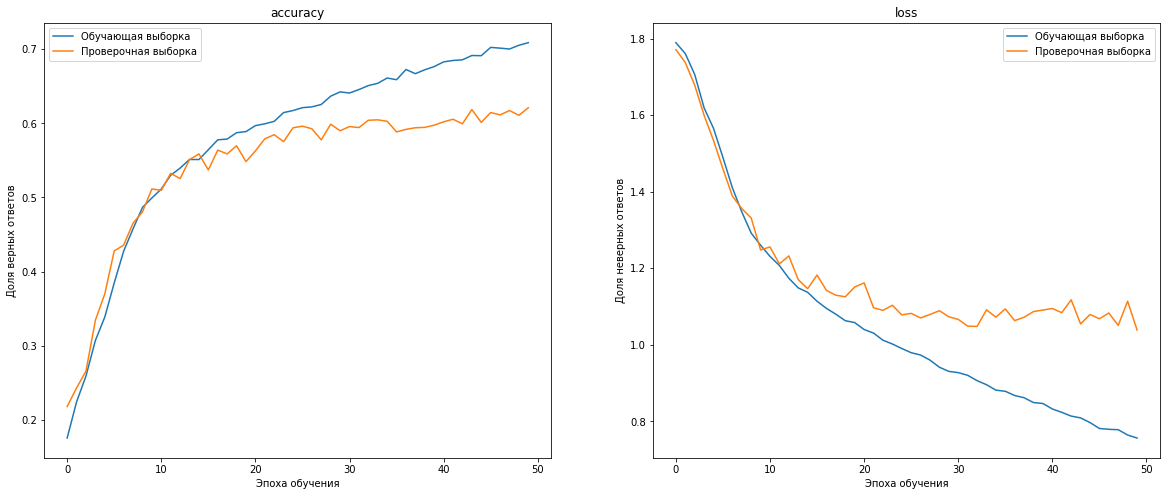

In [ ]:
plt.figure(1, figsize=(20, 8))

plt.subplot(121)
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='Обучающая выборка') 
plt.plot(history.history['val_accuracy'], label='Проверочная выборка')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

plt.subplot(122)
plt.title('loss')
plt.plot(history.history['loss'], label='Обучающая выборка') 
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля неверных ответов')
plt.legend()

plt.show()

## Сохранение обучения

In [ ]:
model.save_weights('/content/drive/My Drive/emotion_model_weights.h5')